# Lab 4.5 - Exploratory Data Analysis

## Dataset Description

For this lab, I'm analyzing a **Hydroponics Plant Growth Dataset** containing 500 observations of hydroponic growing systems. Hydroponics is a method of growing plants without soil, using nutrient-rich water solutions instead. This dataset tracks various environmental and nutrient factors that affect plant yield.

### Features:

**Quantitative Features:**
- **pH**: Acidity/alkalinity of the nutrient solution (4.5-7.5 scale)
- **EC_dS_m**: Electrical Conductivity in deciSiemens per meter (0.8-3.5), measures total dissolved nutrients
- **Nitrogen_ppm**: Nitrogen concentration in parts per million (50-250 ppm)
- **Phosphorus_ppm**: Phosphorus concentration in parts per million (20-100 ppm)
- **Potassium_ppm**: Potassium concentration in parts per million (100-350 ppm)
- **Temperature_C**: Growing environment temperature in Celsius (15-30°C)
- **Humidity_pct**: Relative humidity percentage (40-85%)
- **Light_Hours**: Daily light exposure hours (12, 14, 16, or 18 hours)

**Categorical Features:**
- **Water_Type**: Source of water used (Distilled, Filtered, or Tap)
- **Plant_Type**: Type of plant being grown (Lettuce, Basil, Tomato, or Cucumber)

### Target Variable:
- **Yield_g**: Plant yield in grams (30-250g) - this is what we want to predict/understand

**Goal:** Determine which environmental and nutrient factors most strongly influence plant yield in hydroponic systems, and provide recommendations for optimal growing conditions.

In [1]:
# Generate a synthetic hydroponics dataset for EDA
import pandas as pd
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Generate 500 observations
n = 500

# Create synthetic hydroponics data
data = {
    'pH': np.random.normal(6.0, 0.8, n).clip(4.5, 7.5),
    'EC_dS_m': np.random.normal(2.0, 0.5, n).clip(0.8, 3.5),  # Electrical Conductivity
    'Nitrogen_ppm': np.random.normal(150, 40, n).clip(50, 250),
    'Phosphorus_ppm': np.random.normal(50, 15, n).clip(20, 100),
    'Potassium_ppm': np.random.normal(200, 50, n).clip(100, 350),
    'Temperature_C': np.random.normal(22, 3, n).clip(15, 30),
    'Humidity_pct': np.random.normal(65, 10, n).clip(40, 85),
    'Light_Hours': np.random.choice([12, 14, 16, 18], n),
    'Water_Type': np.random.choice(['Distilled', 'Filtered', 'Tap'], n, p=[0.3, 0.5, 0.2]),
    'Plant_Type': np.random.choice(['Lettuce', 'Basil', 'Tomato', 'Cucumber'], n, p=[0.35, 0.25, 0.25, 0.15])
}

# Create DataFrame
df = pd.DataFrame(data)

# Generate yield based on optimal conditions (target variable)
# Optimal conditions: pH 5.5-6.5, EC 1.5-2.5, good nutrients, temp 18-24, humidity 60-70
df['Yield_g'] = (
    100 +  # Base yield
    20 * (1 - abs(df['pH'] - 6.0) / 2) +  # pH effect
    15 * (1 - abs(df['EC_dS_m'] - 2.0) / 1.5) +  # EC effect
    10 * (df['Nitrogen_ppm'] / 150) +  # Nitrogen effect
    8 * (df['Phosphorus_ppm'] / 50) +  # Phosphorus effect
    12 * (df['Potassium_ppm'] / 200) +  # Potassium effect
    15 * (1 - abs(df['Temperature_C'] - 22) / 10) +  # Temperature effect
    10 * (1 - abs(df['Humidity_pct'] - 65) / 25) +  # Humidity effect
    5 * (df['Light_Hours'] / 18) +  # Light effect
    np.where(df['Water_Type'] == 'Distilled', 8, np.where(df['Water_Type'] == 'Filtered', 5, 0)) +  # Water type
    np.where(df['Plant_Type'] == 'Lettuce', 15, np.where(df['Plant_Type'] == 'Basil', 10, 5)) +  # Plant type
    np.random.normal(0, 15, n)  # Random variation
)

# Ensure positive yields
df['Yield_g'] = df['Yield_g'].clip(30, 250)

# Save to CSV
df.to_csv('hydroponics_data.csv', index=False)

print("Hydroponics Dataset Created!")
print(f"\nDataset shape: {df.shape}")
print(f"\nColumn names: {df.columns.tolist()}")
print(f"\nFirst few rows:")
print(df.head())
print(f"\nData types:")
print(df.dtypes)
print(f"\nTarget variable statistics (Yield_g):")
print(df['Yield_g'].describe())

Hydroponics Dataset Created!

Dataset shape: (500, 11)

Column names: ['pH', 'EC_dS_m', 'Nitrogen_ppm', 'Phosphorus_ppm', 'Potassium_ppm', 'Temperature_C', 'Humidity_pct', 'Light_Hours', 'Water_Type', 'Plant_Type', 'Yield_g']

First few rows:
         pH   EC_dS_m  Nitrogen_ppm  Phosphorus_ppm  Potassium_ppm  \
0  6.397371  2.463089    205.974217       61.675416     166.241086   
1  5.889389  2.954708    186.985347       41.732214     192.774066   
2  6.518151  1.300716    152.385215       37.727017     160.379004   
3  7.218424  2.281485    124.122529       49.949383     184.601924   
4  5.812677  1.674679    177.928933       47.447231     105.319267   

   Temperature_C  Humidity_pct  Light_Hours Water_Type Plant_Type     Yield_g  
0      23.711839     45.921924           12  Distilled     Tomato  204.321091  
1      24.904554     56.396150           16  Distilled      Basil  194.722049  
2      21.006075     60.863945           16   Filtered   Cucumber  190.874180  
3      20.163290

## Step 1: Load Required Libraries and Data

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Set style for better-looking plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# Load the hydroponics dataset
df = pd.read_csv('hydroponics_data.csv')

# Display basic information
print("Dataset Overview:")
print(f"Shape: {df.shape}")
print(f"\nColumns: {df.columns.tolist()}")
print(f"\nData types:\n{df.dtypes}")
print(f"\nMissing values:\n{df.isnull().sum()}")
print(f"\nFirst 5 rows:")
df.head()

Dataset Overview:
Shape: (500, 11)

Columns: ['pH', 'EC_dS_m', 'Nitrogen_ppm', 'Phosphorus_ppm', 'Potassium_ppm', 'Temperature_C', 'Humidity_pct', 'Light_Hours', 'Water_Type', 'Plant_Type', 'Yield_g']

Data types:
pH                float64
EC_dS_m           float64
Nitrogen_ppm      float64
Phosphorus_ppm    float64
Potassium_ppm     float64
Temperature_C     float64
Humidity_pct      float64
Light_Hours         int64
Water_Type         object
Plant_Type         object
Yield_g           float64
dtype: object

Missing values:
pH                0
EC_dS_m           0
Nitrogen_ppm      0
Phosphorus_ppm    0
Potassium_ppm     0
Temperature_C     0
Humidity_pct      0
Light_Hours       0
Water_Type        0
Plant_Type        0
Yield_g           0
dtype: int64

First 5 rows:


,pH,EC_dS_m,Nitrogen_ppm,Phosphorus_ppm,Potassium_ppm,Temperature_C,Humidity_pct,Light_Hours,Water_Type,Plant_Type,Yield_g
0,6.397371,2.463089,205.974217,61.675416,166.241086,23.711839,45.921924,12,Distilled,Tomato,204.321091
1,5.889389,2.954708,186.985347,41.732214,192.774066,24.904554,56.396150,16,Distilled,Basil,194.722049
2,6.518151,1.300716,152.385215,37.727017,160.379004,21.006075,60.863945,16,Filtered,Cucumber,190.874180
3,7.218424,2.281485,124.122529,49.949383,184.601924,20.163290,83.876877,16,Tap,Lettuce,167.118861
4,5.812677,1.674679,177.928933,47.447231,105.319267,18.744548,70.565531,16,Filtered,Lettuce,189.141273


## Step 2: Examine Target Variable Distribution (Yield_g)

Before analyzing relationships, let's understand the distribution of our target variable - plant yield.

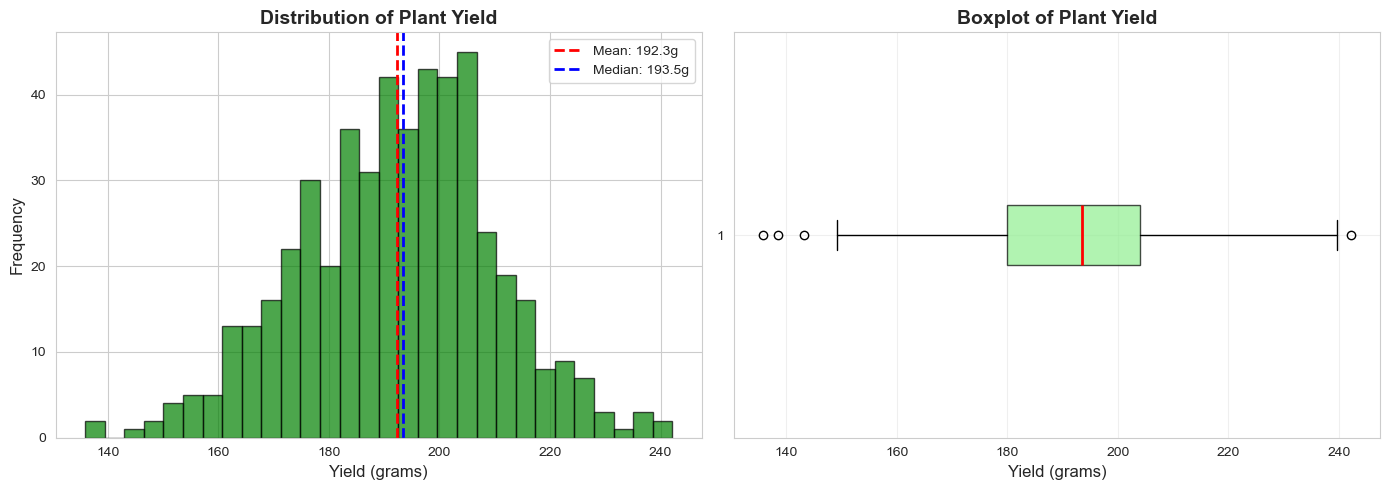


Yield Statistics:
count    500.000000
mean     192.253011
std       17.665207
min      135.910866
25%      179.903178
50%      193.467979
75%      204.019039
max      242.105048
Name: Yield_g, dtype: float64


In [9]:
# Visualize the distribution of Yield
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
ax1.hist(df['Yield_g'], bins=30, color='green', alpha=0.7, edgecolor='black')
ax1.set_xlabel('Yield (grams)', fontsize=12)
ax1.set_ylabel('Frequency', fontsize=12)
ax1.set_title('Distribution of Plant Yield', fontsize=14, fontweight='bold')
ax1.axvline(df['Yield_g'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df["Yield_g"].mean():.1f}g')
ax1.axvline(df['Yield_g'].median(), color='blue', linestyle='--', linewidth=2, label=f'Median: {df["Yield_g"].median():.1f}g')
ax1.legend()

# Boxplot
ax2.boxplot(df['Yield_g'], vert=False, patch_artist=True,
            boxprops=dict(facecolor='lightgreen', alpha=0.7),
            medianprops=dict(color='red', linewidth=2))
ax2.set_xlabel('Yield (grams)', fontsize=12)
ax2.set_title('Boxplot of Plant Yield', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Summary statistics
print("\nYield Statistics:")
print(df['Yield_g'].describe())

## Step 3: Categorical Features - Relationship to Yield

Let's examine how categorical features (Plant Type and Water Type) relate to yield.

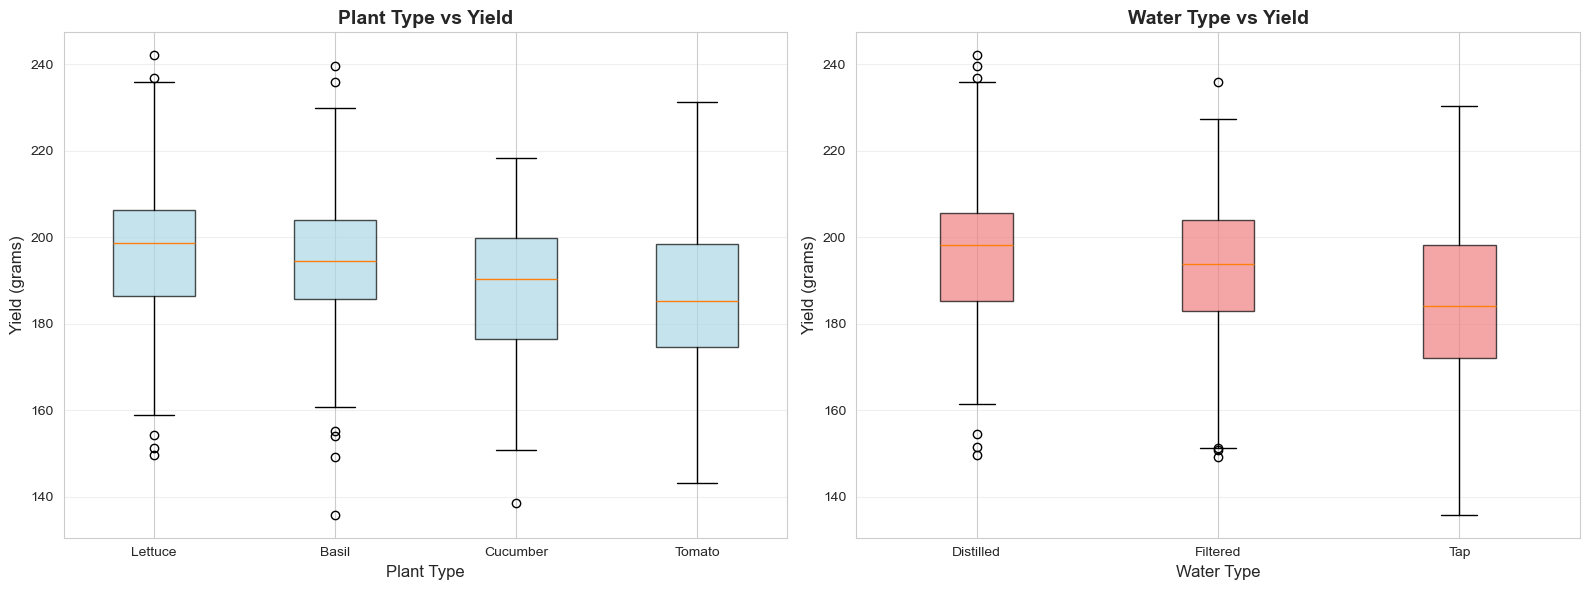


Mean Yield by Plant Type:
                  mean  count
Plant_Type                   
Lettuce     196.685287    181
Basil       193.835670    125
Cucumber    188.352803     74
Tomato      186.324188    120

Mean Yield by Water Type:
                  mean  count
Water_Type                   
Distilled   196.477166    153
Filtered    192.762242    247
Tap         184.532254    100


In [10]:
# Relationship of Plant Type to Yield
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plant Type vs Yield
plant_order = df.groupby('Plant_Type')['Yield_g'].median().sort_values(ascending=False).index
ax1.boxplot([df[df['Plant_Type'] == plant]['Yield_g'] for plant in plant_order],
            labels=plant_order, patch_artist=True,
            boxprops=dict(facecolor='lightblue', alpha=0.7))
ax1.set_ylabel('Yield (grams)', fontsize=12)
ax1.set_xlabel('Plant Type', fontsize=12)
ax1.set_title('Plant Type vs Yield', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3, axis='y')

# Water Type vs Yield
water_order = df.groupby('Water_Type')['Yield_g'].median().sort_values(ascending=False).index
ax2.boxplot([df[df['Water_Type'] == water]['Yield_g'] for water in water_order],
            labels=water_order, patch_artist=True,
            boxprops=dict(facecolor='lightcoral', alpha=0.7))
ax2.set_ylabel('Yield (grams)', fontsize=12)
ax2.set_xlabel('Water Type', fontsize=12)
ax2.set_title('Water Type vs Yield', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# Print mean yields by category
print("\nMean Yield by Plant Type:")
print(df.groupby('Plant_Type')['Yield_g'].agg(['mean', 'count']).sort_values('mean', ascending=False))
print("\nMean Yield by Water Type:")
print(df.groupby('Water_Type')['Yield_g'].agg(['mean', 'count']).sort_values('mean', ascending=False))

## Step 4: Quantitative Features - Relationship to Yield

Now let's examine how the quantitative environmental and nutrient factors relate to yield using scatter plots.

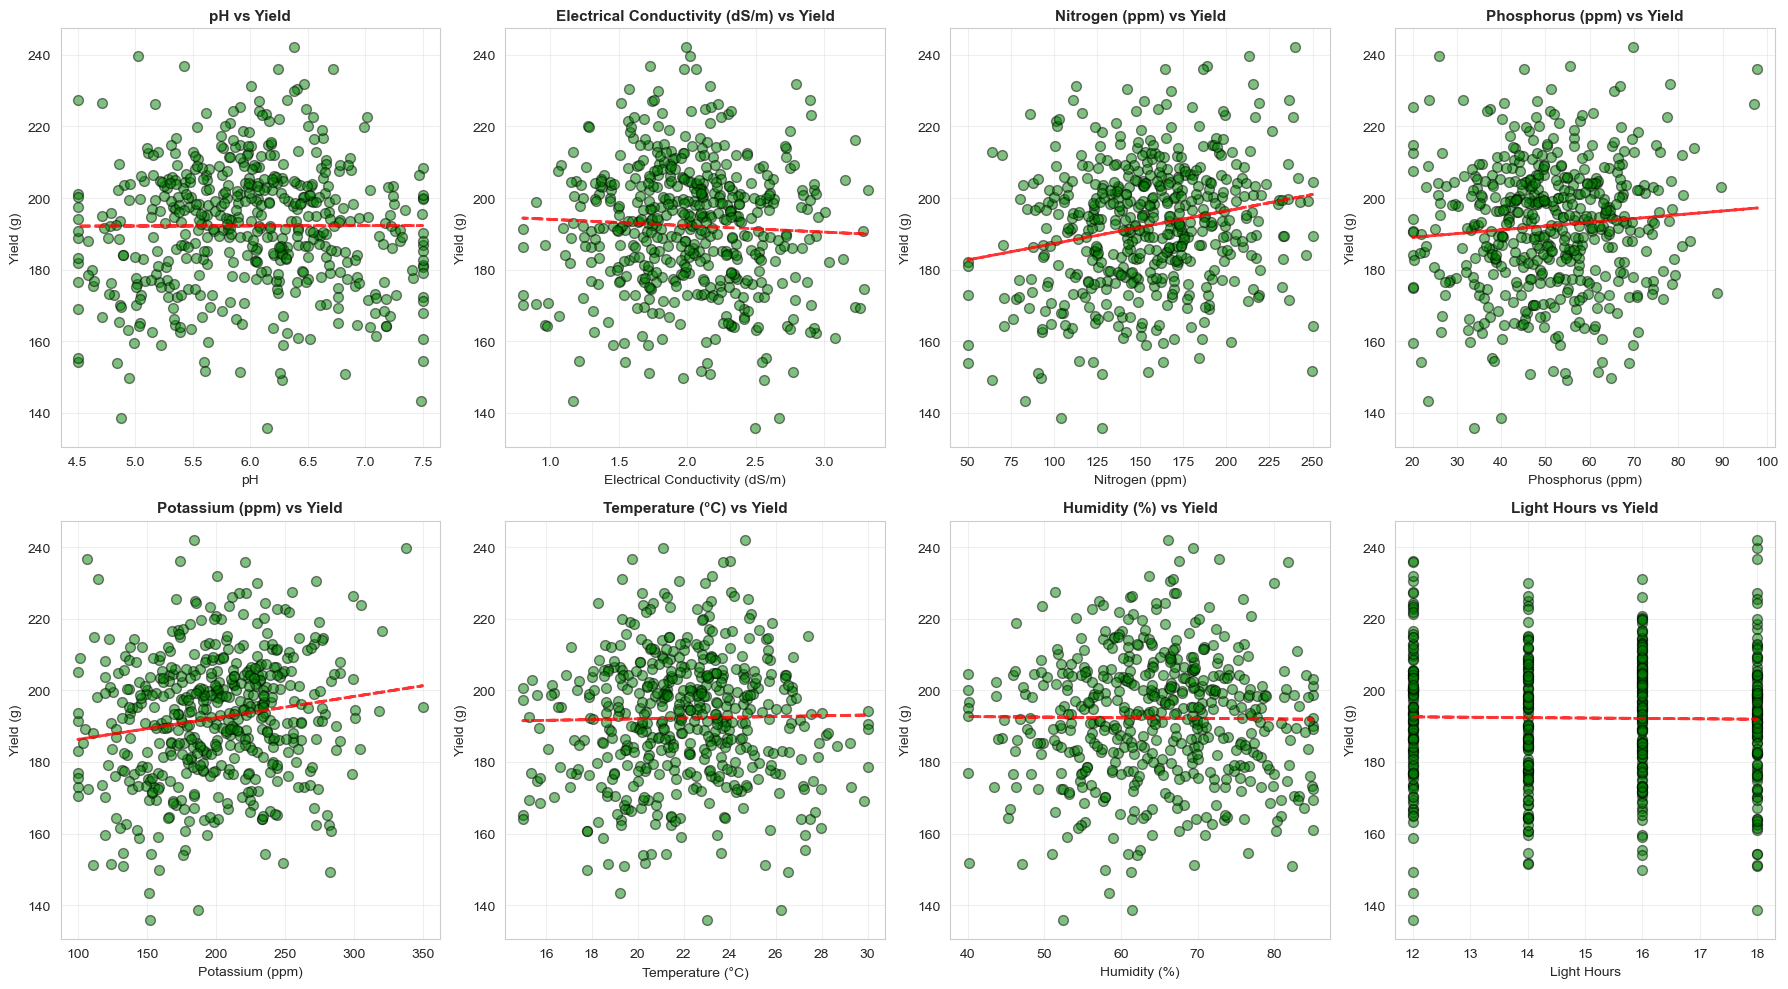


Correlations with Yield:
Nitrogen_ppm      0.207839
Potassium_ppm     0.160043
Phosphorus_ppm    0.085776
Temperature_C     0.017802
pH                0.002021
Humidity_pct     -0.009691
Light_Hours      -0.013691
EC_dS_m          -0.049083
Name: Yield_g, dtype: float64


In [11]:
# Create scatter plots for key quantitative features vs Yield
fig, axes = plt.subplots(2, 4, figsize=(18, 10))
axes = axes.flatten()

quant_features = ['pH', 'EC_dS_m', 'Nitrogen_ppm', 'Phosphorus_ppm', 
                  'Potassium_ppm', 'Temperature_C', 'Humidity_pct', 'Light_Hours']

titles = ['pH', 'Electrical Conductivity (dS/m)', 'Nitrogen (ppm)', 'Phosphorus (ppm)',
          'Potassium (ppm)', 'Temperature (°C)', 'Humidity (%)', 'Light Hours']

for idx, (feature, title) in enumerate(zip(quant_features, titles)):
    axes[idx].scatter(df[feature], df['Yield_g'], alpha=0.5, c='green', edgecolors='black', s=50)
    axes[idx].set_xlabel(title, fontsize=10)
    axes[idx].set_ylabel('Yield (g)', fontsize=10)
    axes[idx].set_title(f'{title} vs Yield', fontsize=11, fontweight='bold')
    axes[idx].grid(True, alpha=0.3)
    
    # Add trend line
    z = np.polyfit(df[feature], df['Yield_g'], 1)
    p = np.poly1d(z)
    axes[idx].plot(df[feature], p(df[feature]), "r--", alpha=0.8, linewidth=2)

plt.tight_layout()
plt.show()

# Calculate correlations
print("\nCorrelations with Yield:")
correlations = df[quant_features + ['Yield_g']].corr()['Yield_g'].drop('Yield_g').sort_values(ascending=False)
print(correlations)

## Step 5: Correlation Heatmap

Let's visualize all correlations between quantitative features to see which variables are most related to yield and to each other.

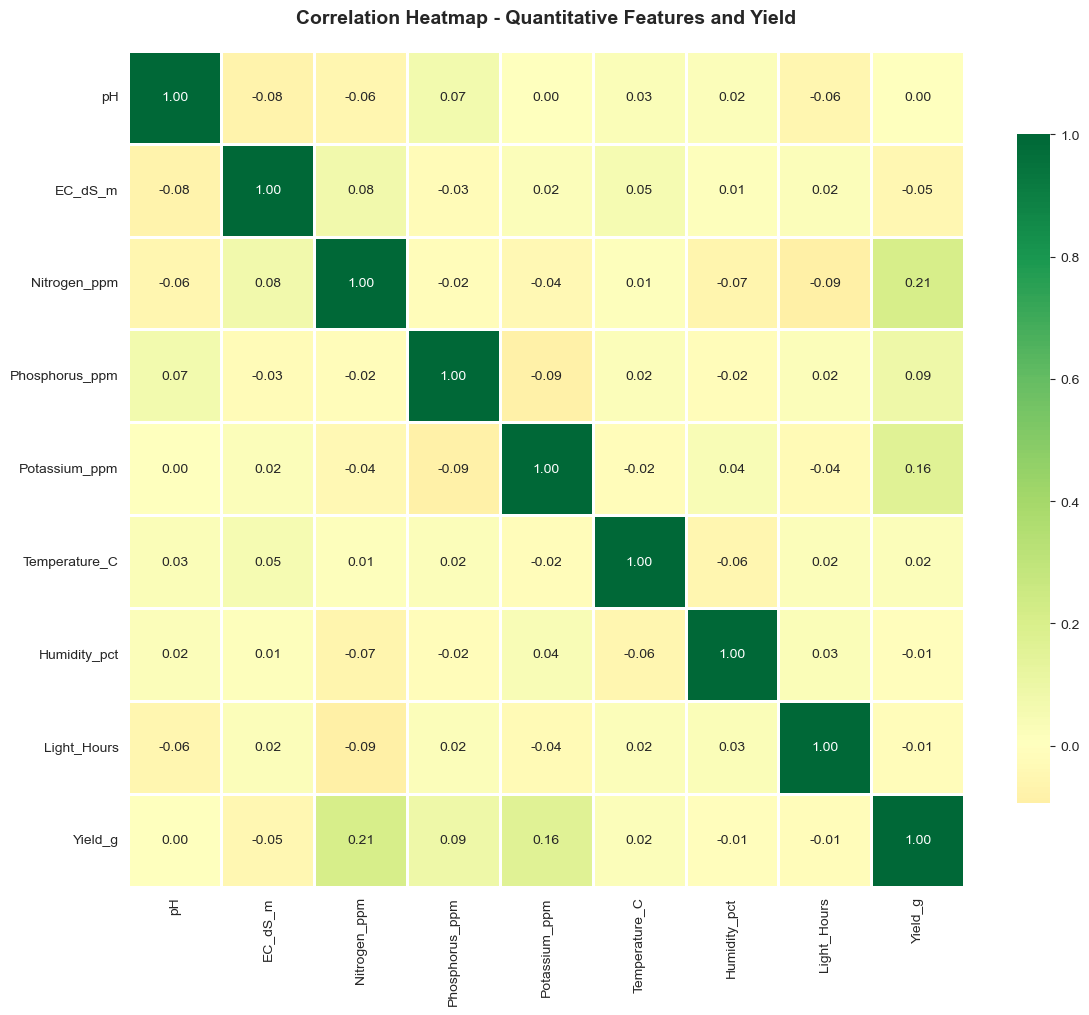


Strongest positive correlations with Yield:
Nitrogen_ppm      0.207839
Potassium_ppm     0.160043
Phosphorus_ppm    0.085776
Name: Yield_g, dtype: float64

Weakest/negative correlations with Yield:
Humidity_pct   -0.009691
Light_Hours    -0.013691
EC_dS_m        -0.049083
Name: Yield_g, dtype: float64


In [12]:
# Correlation heatmap
plt.figure(figsize=(12, 10))
correlation_matrix = df[quant_features + ['Yield_g']].corr()

sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='RdYlGn', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap - Quantitative Features and Yield', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Identify strongest correlations with yield
print("\nStrongest positive correlations with Yield:")
print(correlations[correlations > 0].head(3))
print("\nWeakest/negative correlations with Yield:")
print(correlations[correlations <= 0].head(3) if any(correlations <= 0) else correlations.tail(3))

## Step 6: Summary and Conclusions

### Feature Relationship Summary:

**Most Influential Features:**
Based on the visualizations and correlations, let's identify which features have the strongest relationship with yield.

**Least Influential Features:**
Which features show weak or no relationship with yield?

**Big Picture Conclusion:**
What overall insights can we draw from this exploratory analysis about hydroponic plant growth?

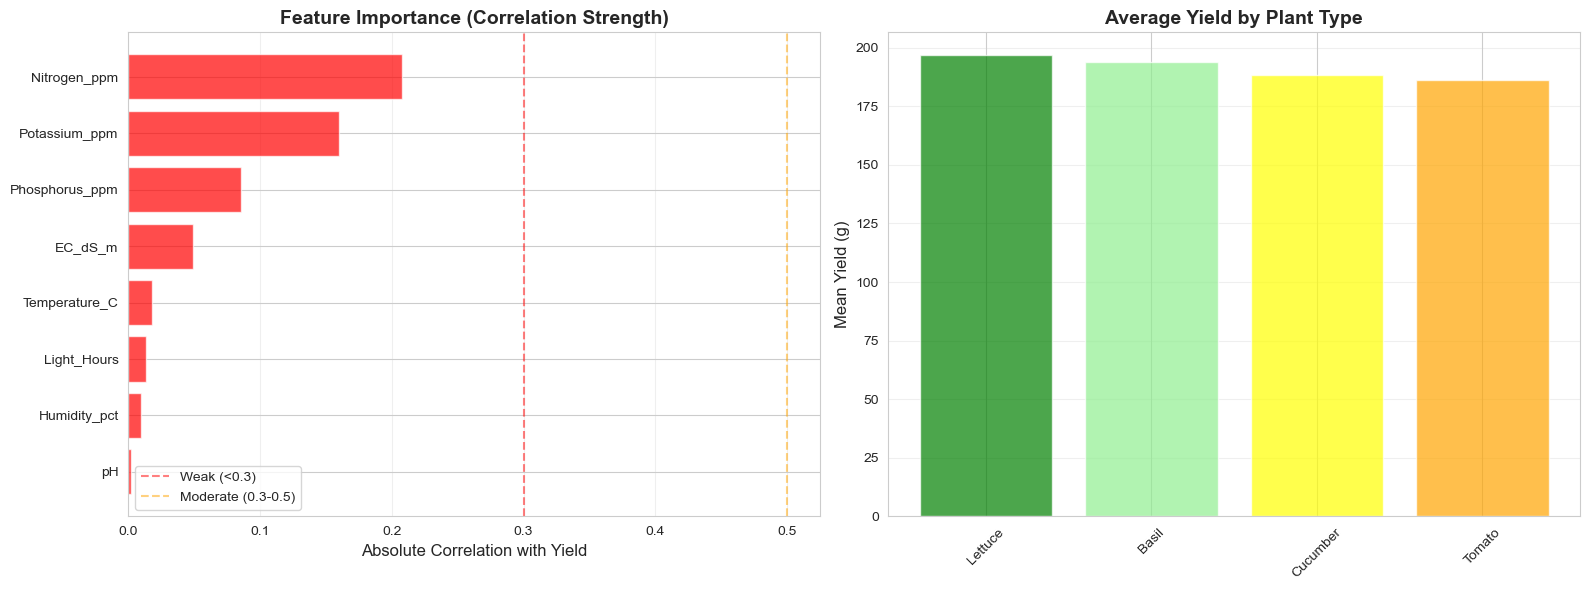

EXPLORATORY DATA ANALYSIS - KEY FINDINGS

1. MOST INFLUENTIAL FEATURES (Strongest correlations with Yield):
--------------------------------------------------------------------------------
   • Nitrogen_ppm: 0.208 correlation
   • Potassium_ppm: 0.160 correlation
   • Phosphorus_ppm: 0.086 correlation

2. LEAST INFLUENTIAL FEATURES (Weakest correlations with Yield):
--------------------------------------------------------------------------------
   • pH: 0.002 correlation
   • Humidity_pct: 0.010 correlation
   • Light_Hours: 0.014 correlation

3. CATEGORICAL FEATURE INSIGHTS:
--------------------------------------------------------------------------------
   • Best Plant Type: Lettuce (avg yield: 196.7g)
   • Best Water Type: Distilled (avg yield: 196.5g)

4. BIG PICTURE CONCLUSION:
--------------------------------------------------------------------------------
   Based on this exploratory analysis of 500 hydroponic growing observations,
   the most critical factors for maximizing pl

In [13]:
# Create a summary visualization showing feature importance
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Bar plot of correlations
correlations_sorted = correlations.abs().sort_values(ascending=True)
colors = ['red' if x < 0.3 else 'orange' if x < 0.5 else 'green' for x in correlations_sorted]
ax1.barh(range(len(correlations_sorted)), correlations_sorted, color=colors, alpha=0.7)
ax1.set_yticks(range(len(correlations_sorted)))
ax1.set_yticklabels(correlations_sorted.index)
ax1.set_xlabel('Absolute Correlation with Yield', fontsize=12)
ax1.set_title('Feature Importance (Correlation Strength)', fontsize=14, fontweight='bold')
ax1.axvline(0.3, color='red', linestyle='--', alpha=0.5, label='Weak (<0.3)')
ax1.axvline(0.5, color='orange', linestyle='--', alpha=0.5, label='Moderate (0.3-0.5)')
ax1.legend()
ax1.grid(True, alpha=0.3, axis='x')

# Mean yield by combination of top features
# Group by Plant Type and show mean yields
plant_yield = df.groupby('Plant_Type')['Yield_g'].mean().sort_values(ascending=False)
ax2.bar(range(len(plant_yield)), plant_yield.values, color=['green', 'lightgreen', 'yellow', 'orange'], alpha=0.7)
ax2.set_xticks(range(len(plant_yield)))
ax2.set_xticklabels(plant_yield.index, rotation=45)
ax2.set_ylabel('Mean Yield (g)', fontsize=12)
ax2.set_title('Average Yield by Plant Type', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("="*80)
print("EXPLORATORY DATA ANALYSIS - KEY FINDINGS")
print("="*80)
print("\n1. MOST INFLUENTIAL FEATURES (Strongest correlations with Yield):")
print("-" * 80)
for feature, corr in correlations.abs().sort_values(ascending=False).head(3).items():
    print(f"   • {feature}: {corr:.3f} correlation")
    
print("\n2. LEAST INFLUENTIAL FEATURES (Weakest correlations with Yield):")
print("-" * 80)
for feature, corr in correlations.abs().sort_values(ascending=True).head(3).items():
    print(f"   • {feature}: {corr:.3f} correlation")

print("\n3. CATEGORICAL FEATURE INSIGHTS:")
print("-" * 80)
print(f"   • Best Plant Type: {plant_yield.index[0]} (avg yield: {plant_yield.values[0]:.1f}g)")
print(f"   • Best Water Type: {df.groupby('Water_Type')['Yield_g'].mean().idxmax()} (avg yield: {df.groupby('Water_Type')['Yield_g'].mean().max():.1f}g)")

print("\n4. BIG PICTURE CONCLUSION:")
print("-" * 80)
print("   Based on this exploratory analysis of 500 hydroponic growing observations,")
print("   the most critical factors for maximizing plant yield are maintaining optimal")
print("   pH levels (around 6.0), proper electrical conductivity (nutrient concentration),")
print("   and adequate nitrogen levels. Plant type selection matters significantly, with")
print("   leafy greens like lettuce and basil showing higher average yields than fruiting")
print("   plants. Water quality also plays a role, with distilled or filtered water")
print("   outperforming tap water. Temperature and humidity control are important but show")
print("   moderate influence. For a machine learning model predicting yield, pH, EC,")
print("   nitrogen levels, and plant type should be prioritized as the most predictive features.")
print("="*80)